In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


from datetime import date, time, datetime, timedelta

import pickle

In [2]:
df_engagement = pd.read_csv('engagement.csv', index_col='Unnamed: 0')

In [3]:
df_engagement.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [4]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 716.0+ KB


- Vamos a crear una columna con la fecha completa en formato datetime  
- Otra columna con la fecha sin el año en formato datetime
- Una columna con la hora

In [5]:
df_engagement

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [6]:
df_engagement['fecha_y_hora'] = pd.to_datetime(df_engagement['status_published'], format="%m/%d/%Y %H:%M")
df_engagement.drop('status_published', axis= 1, inplace=True)

In [7]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_id      7050 non-null   object        
 1   status_type    7050 non-null   object        
 2   num_reactions  7050 non-null   int64         
 3   num_comments   7050 non-null   int64         
 4   num_shares     7050 non-null   int64         
 5   num_likes      7050 non-null   int64         
 6   num_loves      7050 non-null   int64         
 7   num_wows       7050 non-null   int64         
 8   num_hahas      7050 non-null   int64         
 9   num_sads       7050 non-null   int64         
 10  num_angrys     7050 non-null   int64         
 11  fecha_y_hora   7050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 716.0+ KB


Eliminamos la columna Status_id porque no aporta nada

In [8]:
df_engagement.drop('status_id', axis= 1, inplace=True)

In [9]:
df_engagement.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha_y_hora
0,video,529,512,262,432,92,3,1,1,0,2018-04-22 06:00:00
1,photo,150,0,0,150,0,0,0,0,0,2018-04-21 22:45:00
2,video,227,236,57,204,21,1,1,0,0,2018-04-21 06:17:00
3,photo,111,0,0,111,0,0,0,0,0,2018-04-21 02:29:00
4,photo,213,0,0,204,9,0,0,0,0,2018-04-18 03:22:00


Vamos a crear una columna con las estaciones del año

In [10]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_type    7050 non-null   object        
 1   num_reactions  7050 non-null   int64         
 2   num_comments   7050 non-null   int64         
 3   num_shares     7050 non-null   int64         
 4   num_likes      7050 non-null   int64         
 5   num_loves      7050 non-null   int64         
 6   num_wows       7050 non-null   int64         
 7   num_hahas      7050 non-null   int64         
 8   num_sads       7050 non-null   int64         
 9   num_angrys     7050 non-null   int64         
 10  fecha_y_hora   7050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 660.9+ KB


Creamos una nueva columna con las estaciones del año

In [11]:
def estaciones(x):
    dia_mes = datetime(x.year, x.month, x.day)

    primavera = datetime(x.year, 3, 21)
    verano = datetime(x.year, 6, 21)
    otoño = datetime(x.year, 9, 21)
    invierno = datetime(x.year, 12, 21)

    if primavera <= dia_mes < verano:
        return 'primavera'
    elif verano <= dia_mes < otoño:
        return 'verano'
    elif otoño <= dia_mes < invierno:
        return 'otoño'
    else:  
        return 'invierno'

df_engagement['Estaciones'] = df_engagement['fecha_y_hora'].apply(estaciones)


Creamos otra columna con las horas del día

In [12]:
def horario(x):
    hora_mes = datetime(x.year, x.month, x.day, x.hour, x.minute, x.second)

    maniana = datetime(x.year, x.month, x.day, 6, 00, 00)
    tarde = datetime(x.year, x.month, x.day, 13, 00, 00)
    noche = datetime(x.year, x.month, x.day, 21, 00, 00)

    if maniana <= hora_mes < tarde:
        return 'mañana'
    elif tarde <= hora_mes < noche:
        return 'tarde'
    else:  
        return 'noche'

df_engagement['Horarios'] = df_engagement['fecha_y_hora'].apply(horario)

In [13]:
def dia_de_la_semana(x):
    dia_semana = datetime(x.year, x.month, x.day, x.weekday())
    if dia_semana == datetime(x.year, x.month, x.day, 0):
        return 0
    elif dia_semana == datetime(x.year, x.month, x.day, 1):
        return 1
    elif dia_semana == datetime(x.year, x.month, x.day, 2):
        return 2
    elif dia_semana == datetime(x.year, x.month, x.day, 3):
        return 3
    elif dia_semana == datetime(x.year, x.month, x.day, 4):
        return 4
    elif dia_semana == datetime(x.year, x.month, x.day, 5):
        return 5
    else:  
        return 6
#Como según la numeración de Python, la semana empieza en el número 0, que es lunes, lo dejamos así y no tenemos que cambiár más tarde a variables numéricas.
df_engagement['dia'] = df_engagement['fecha_y_hora'].apply(dia_de_la_semana)

In [14]:
# Borramos la columna fecha y hora porque no la vamos a necesitar
df_engagement.drop('fecha_y_hora', axis=1, inplace=True)

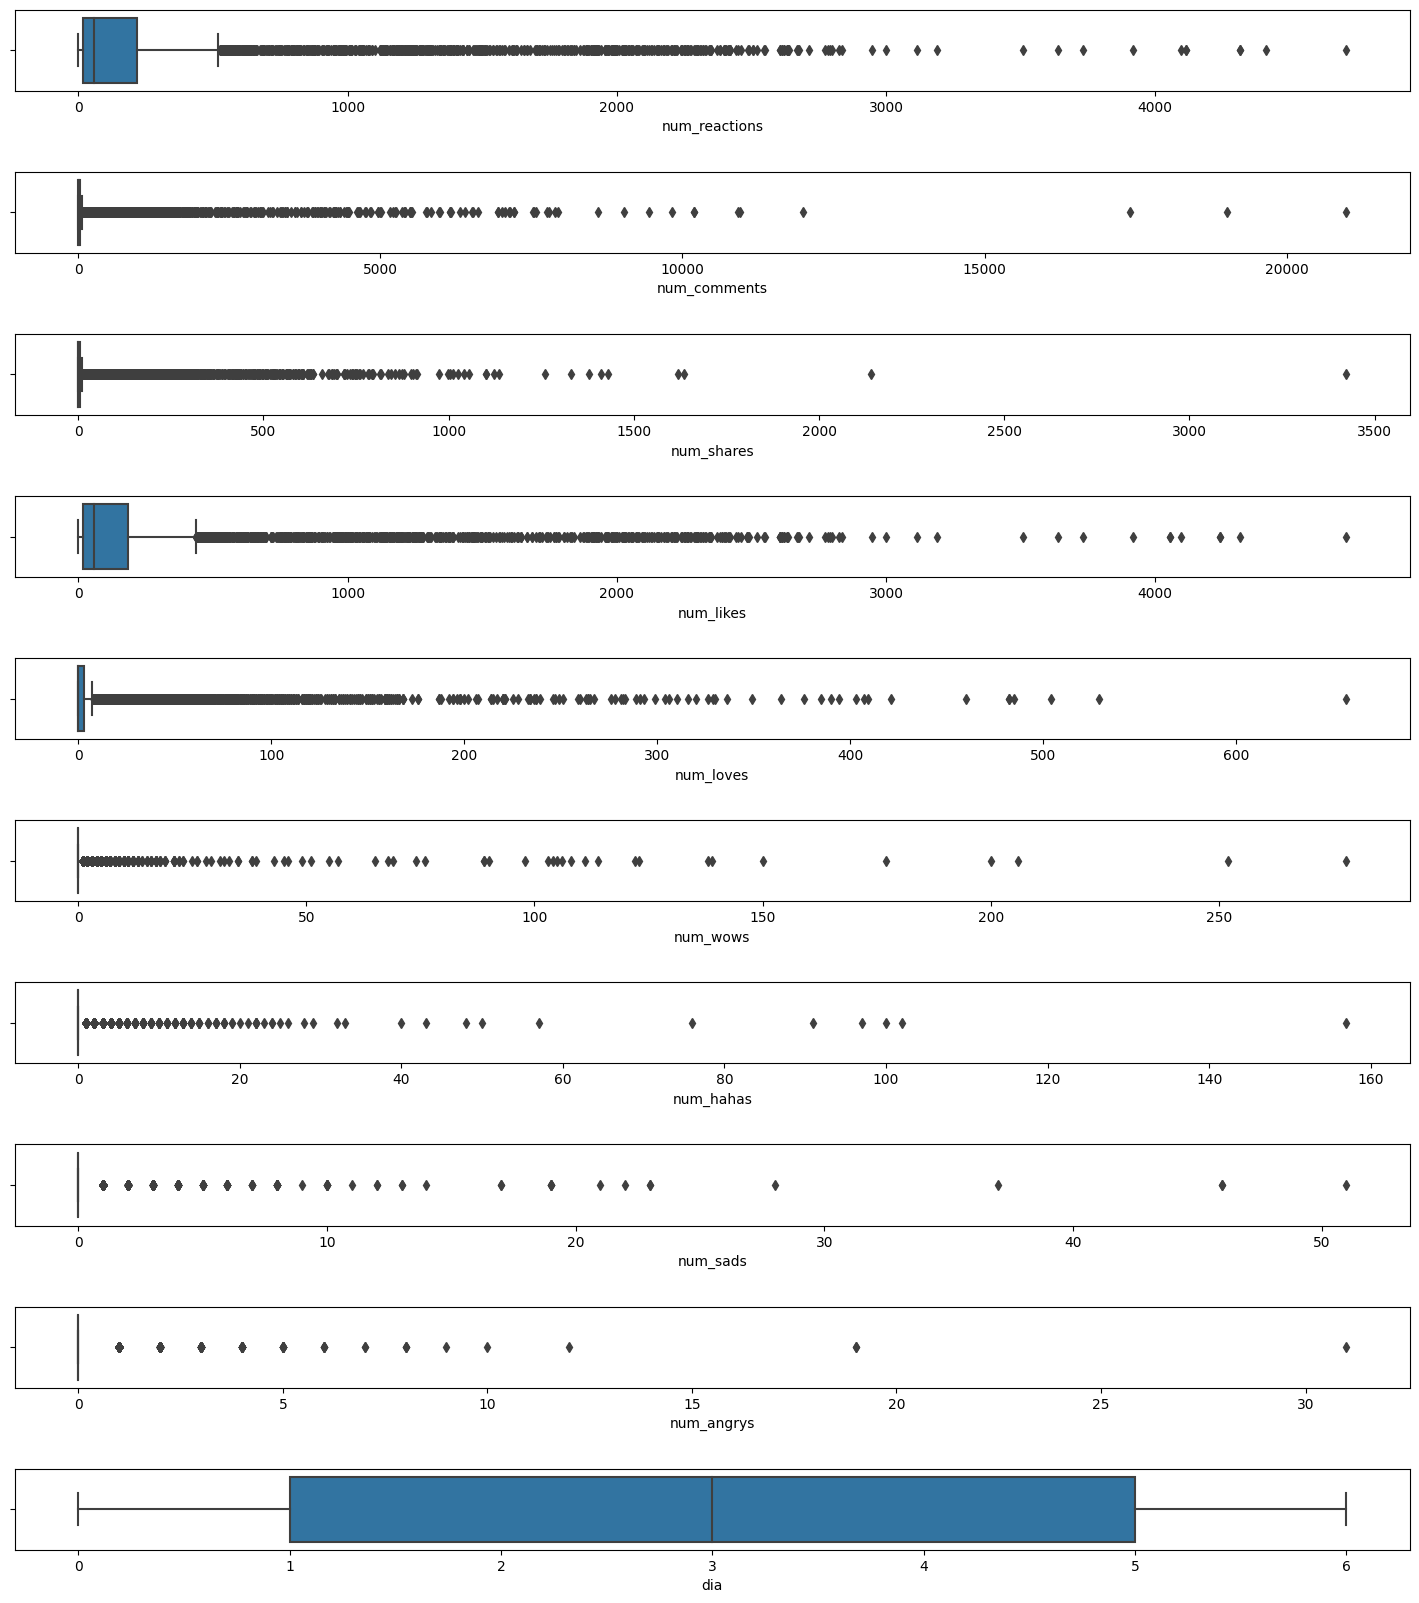

In [15]:
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(18,20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys','dia']):
    sns.boxplot(x=col, data=df_engagement, ax=ax[i])

Como hay muchos atípicos, vamos a agrupar las reacciones positivas (likes y loves) en una sola variable.  
Con sad y angry haremos lo mismo puesto que son reacciones negativas.  
Con Wow y haha no podemos hacerlo puesto que haha puede ser negativo (puede ser que te rías de algo que te parece absurdo) y wow también (puede ser algo tan malo que produzca sorpresa)

In [16]:
df_engagement['Positive_reactions'] = df_engagement['num_likes'] + df_engagement['num_loves']
df_engagement['Negative_reactions'] = df_engagement['num_sads'] + df_engagement['num_angrys']
df_engagement['Other_reactions'] = df_engagement['num_wows'] + df_engagement['num_hahas']

In [17]:
df_engagement.drop('num_likes', axis= 1, inplace=True)
df_engagement.drop('num_loves', axis= 1, inplace=True)
df_engagement.drop('num_sads', axis= 1, inplace=True)
df_engagement.drop('num_angrys', axis= 1, inplace=True)
df_engagement.drop('num_wows', axis= 1, inplace=True)
df_engagement.drop('num_hahas', axis= 1, inplace=True)

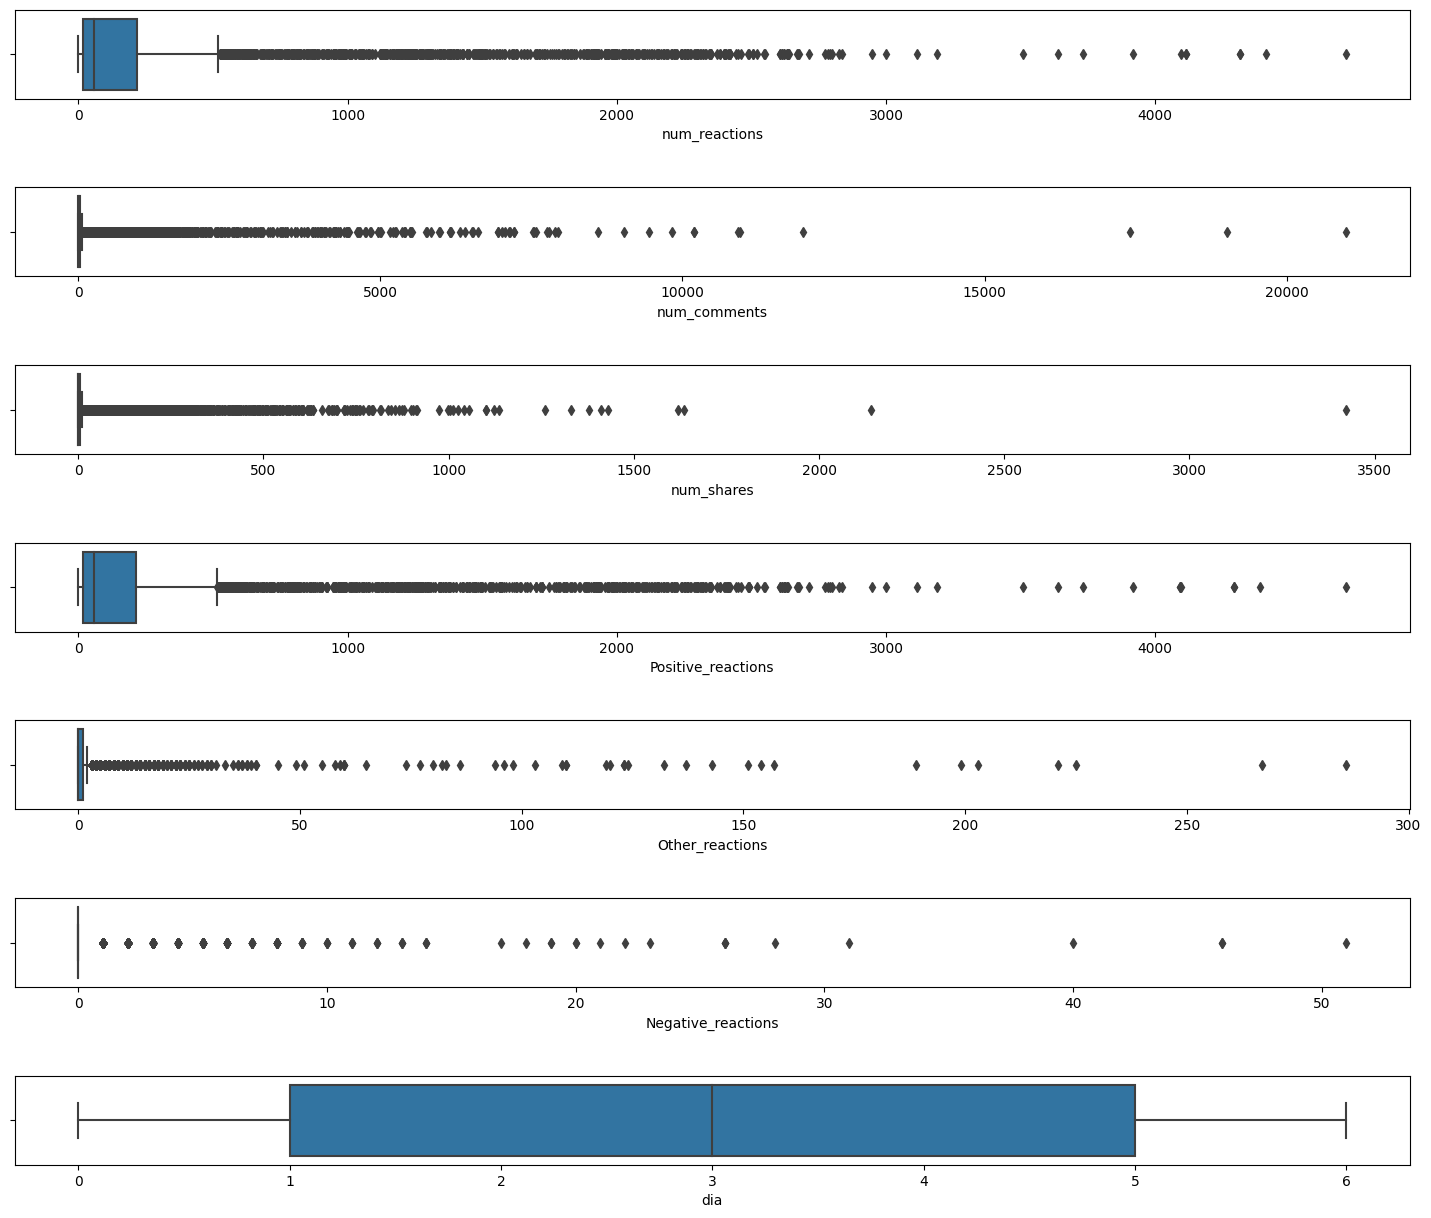

In [18]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(18,15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(['num_reactions', 'num_comments', 'num_shares',
       'Positive_reactions', 'Other_reactions', 'Negative_reactions','dia']):
    sns.boxplot(x=col, data=df_engagement, ax=ax[i])

Vamos a ver cuantos valores tiene la variable negative reactions para ver si podemos eliminarla

In [19]:
df_engagement.Negative_reactions.unique()

array([ 1,  0,  3,  5,  2,  9,  8, 19, 22, 10,  6, 14, 23,  4, 28, 13,  7,
       17, 51, 21, 31, 26, 18, 40, 11, 46, 12, 20], dtype=int64)

Como al corregir los atipicos, lo más seguro es que se nos quede en cero, vamos a convertirla en una variable que tome 1 si hay comentarios negativos y 0 si no hay.  
No la convertimos, de momento, a booleana porque puede dar problemas

In [20]:
reacciones_negativas= lambda x: 1 if x > 0 else 0
df_engagement['Negative_reactions'] = df_engagement['Negative_reactions'].apply(reacciones_negativas)

Borramos los atípicos en todas las variables menos en number of reactions  
Esto es así, puesto que una vez borrados los atípicos de las reacciones, volveremos a calcular esa columna

In [21]:
#Lista atípicos
listaatipicos = ['num_comments', 'num_shares',
       'Positive_reactions', 'Other_reactions']
#Creamos un bucle para recorrer la lista y corregir atípicos
for j in range (len(listaatipicos)):
#Con esta variable creamos un df solo con los los valores del atípico
        df_atipicos = df_engagement[[listaatipicos[j]]]
#Calculamos los cuartiles
        qs = df_atipicos.quantile([.25, .5, .75], numeric_only=True).values
        q1 = qs[0][0]
        q2 = qs[1][0]
        q3 = qs[2][0]
# Definir límites inferior y superior, a partir de los cuales los datos serían considerados como atípicos
        iqr = q3-q1
        iqr_lim_inf = round(q1 - 1.5*iqr)
        iqr_lim_sup = round(q3 + 1.5*iqr)
#Aquí le indicamos que cuando encuentre un valor superior al límite que hemos definido, 
#que nos lo reemplace por el valor asignado al límite superior
#Y viceversa
        df_engagement[listaatipicos[j]] = df_engagement[listaatipicos[j]].apply(
        lambda x: iqr_lim_sup if x > iqr_lim_sup else (iqr_lim_inf if x < iqr_lim_inf else x))

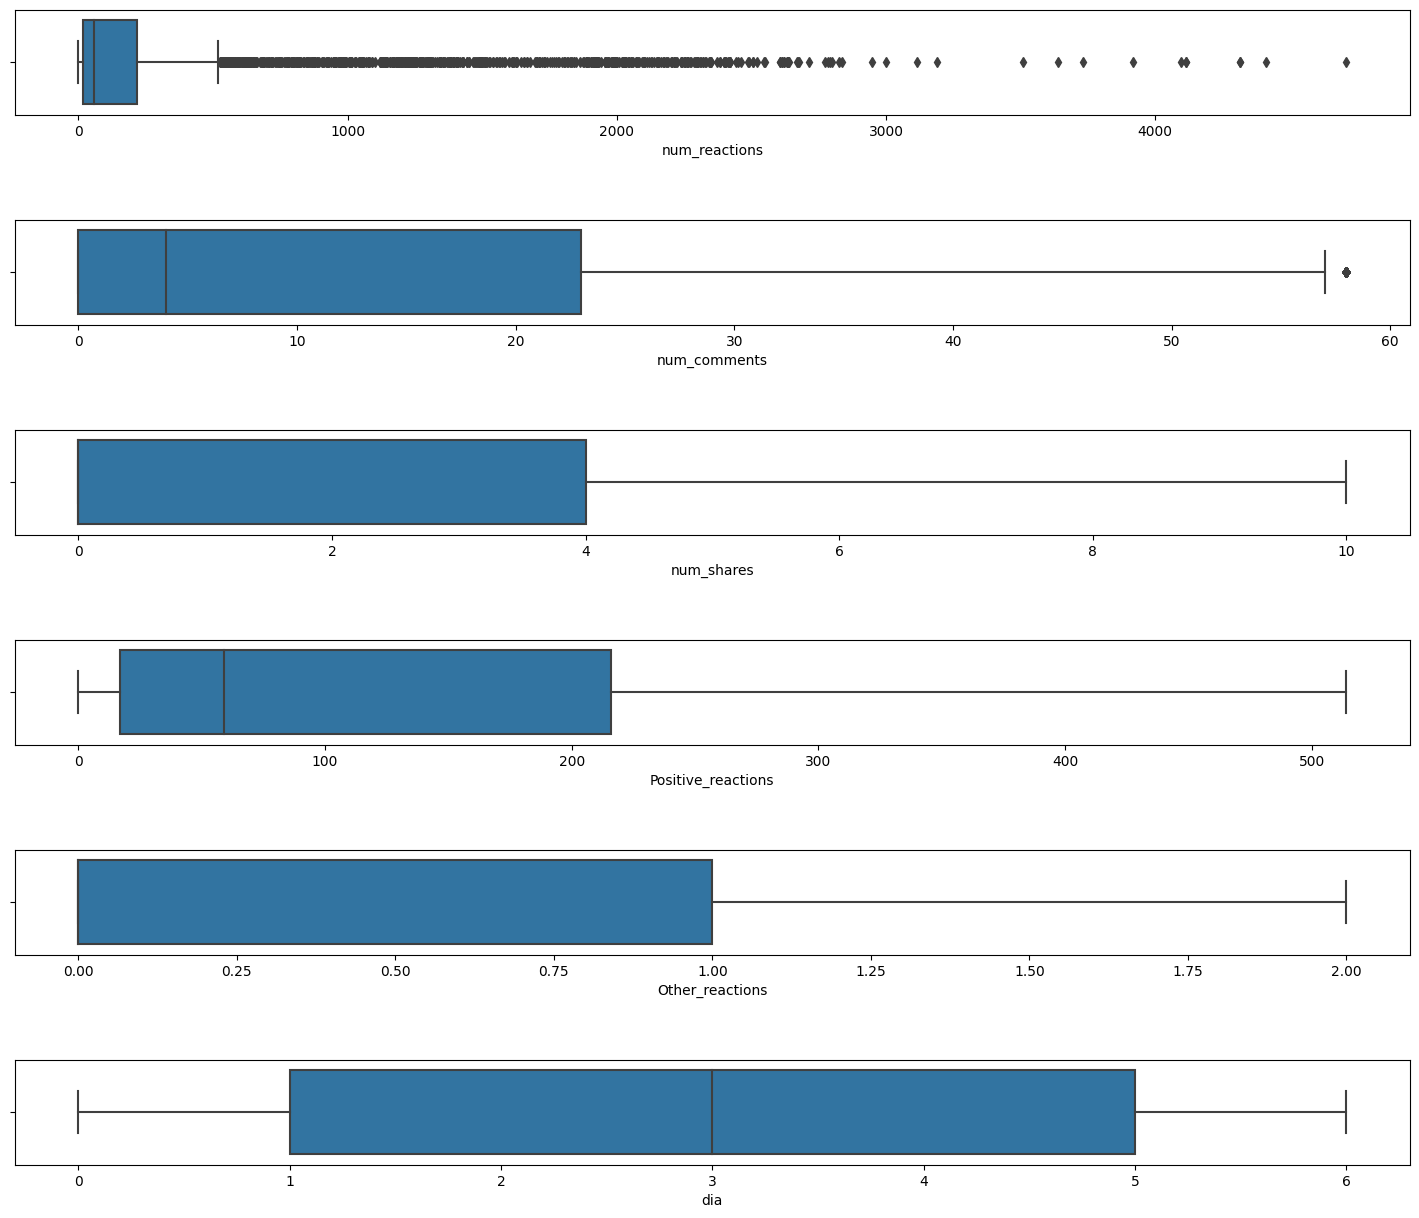

In [22]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(18,15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(['num_reactions', 'num_comments', 'num_shares',
       'Positive_reactions', 'Other_reactions','dia']):
    sns.boxplot(x=col, data=df_engagement, ax=ax[i])

Recalculamos Number of reactions

In [23]:
# Le sumamos reacciones positivas y otras reacciones
df_engagement['num_reactions'] = df_engagement['Negative_reactions'] + df_engagement['Positive_reactions'] + df_engagement['Other_reactions']

Ya estarían corregidos los datos atípicos

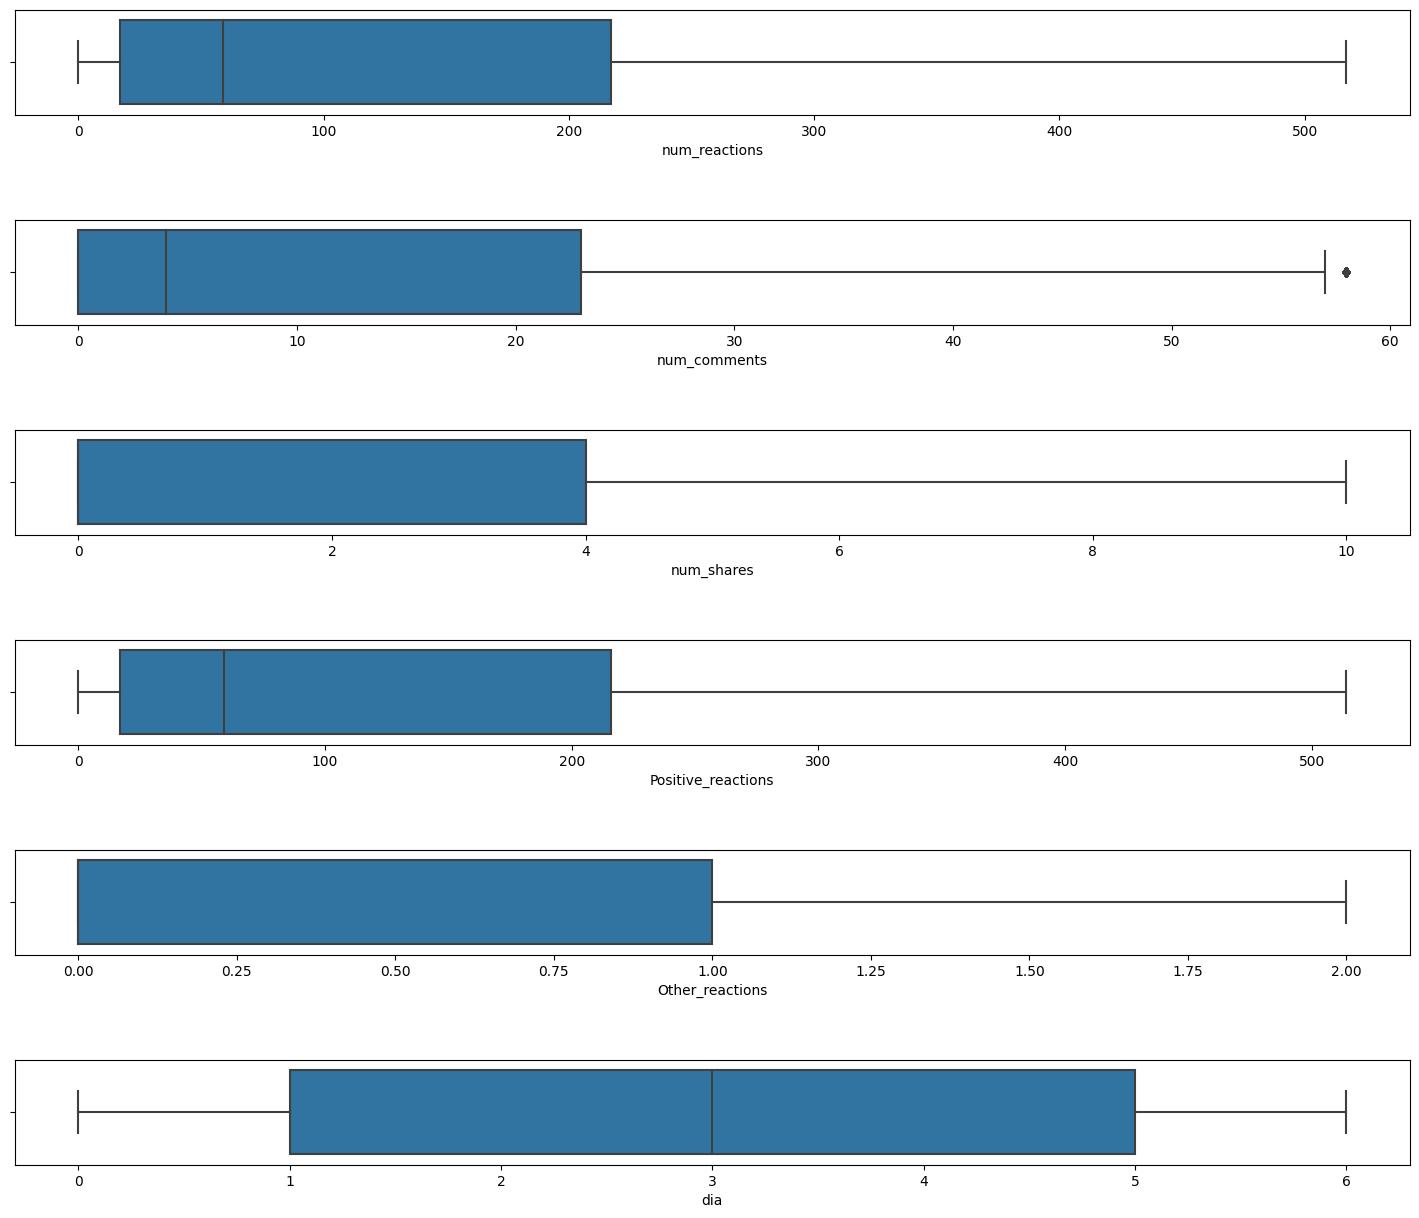

In [24]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(18,15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(['num_reactions', 'num_comments', 'num_shares',
       'Positive_reactions', 'Other_reactions','dia']):
    sns.boxplot(x=col, data=df_engagement, ax=ax[i])

Creamos las variables dummies para estaciones y horarios

De momento sabemos que todas estas variables nos hacen falta

Vamos a ver si hay algun horario que podamos eliminar o agrupar porque no haya muchos valores

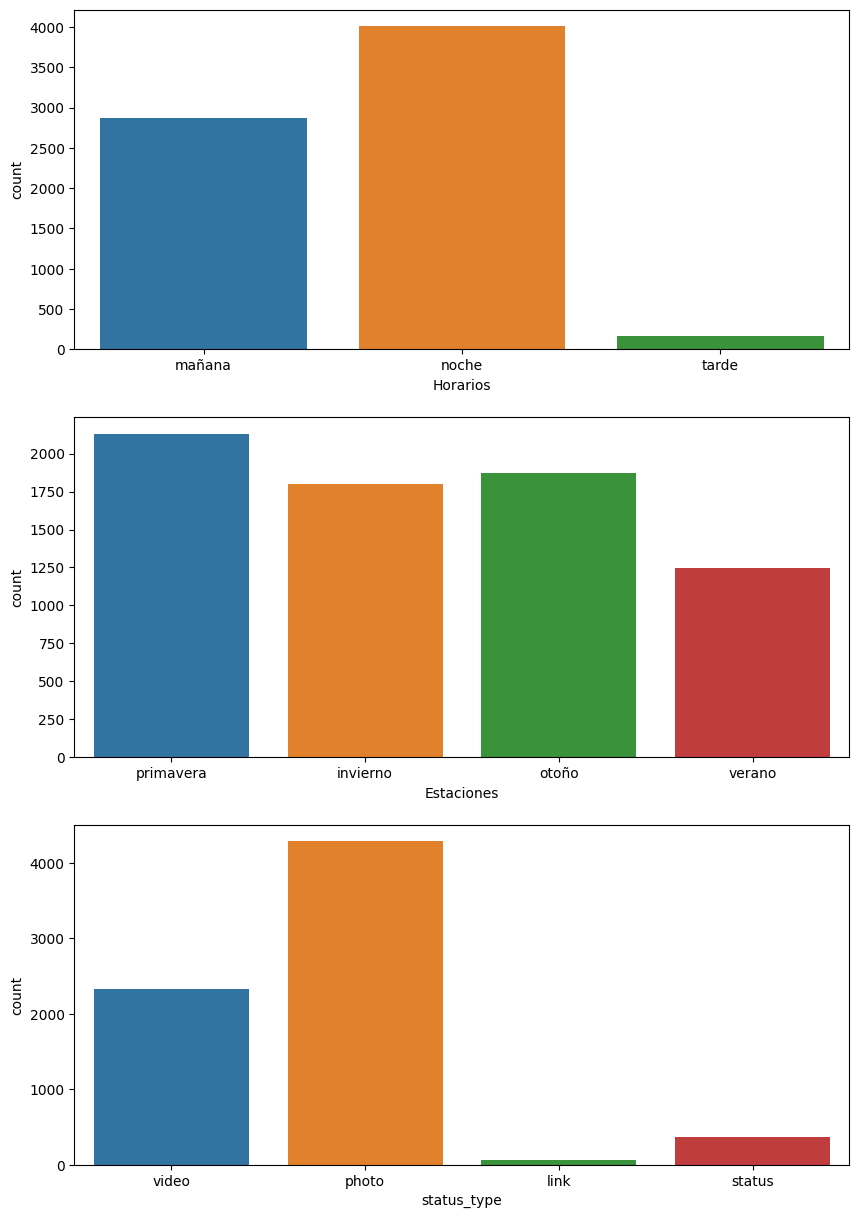

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for i, col in enumerate(['Horarios', 'Estaciones', 'status_type']):
  sns.countplot(x=col, data=df_engagement, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels())

Vamos a combinar los horarios de mañana y tarde porque, vemos claramente que cuando más se comenta es por la noche o por la mañana.  
Por eso hacemos una variable que se llame True, cuando sea la noche. 
Después esa variable, la pasamos a entera para que no nos de problemas el modelo

In [26]:
horarios_dummies = pd.get_dummies(df_engagement['Horarios'], prefix='Horarios')
df_engagement = df_engagement.join(horarios_dummies)
df_engagement.drop('Horarios_mañana', axis = 1, inplace=True)
df_engagement.drop('Horarios_tarde', axis = 1, inplace=True)
df_engagement.drop('Horarios', axis = 1, inplace=True)
df_engagement['Horarios_noche'] = df_engagement['Horarios_noche'].astype(int)

Como los links y los status es lo que menos se comparte, vamos a tratarlo como una sola variable

In [27]:
status_o_links= lambda x: 'status/link' if ((x == 'status')or(x == 'link')) else x
df_engagement['status_type'] = df_engagement['status_type'].apply(status_o_links)

No agrupamos estaciones porque esa información es importante

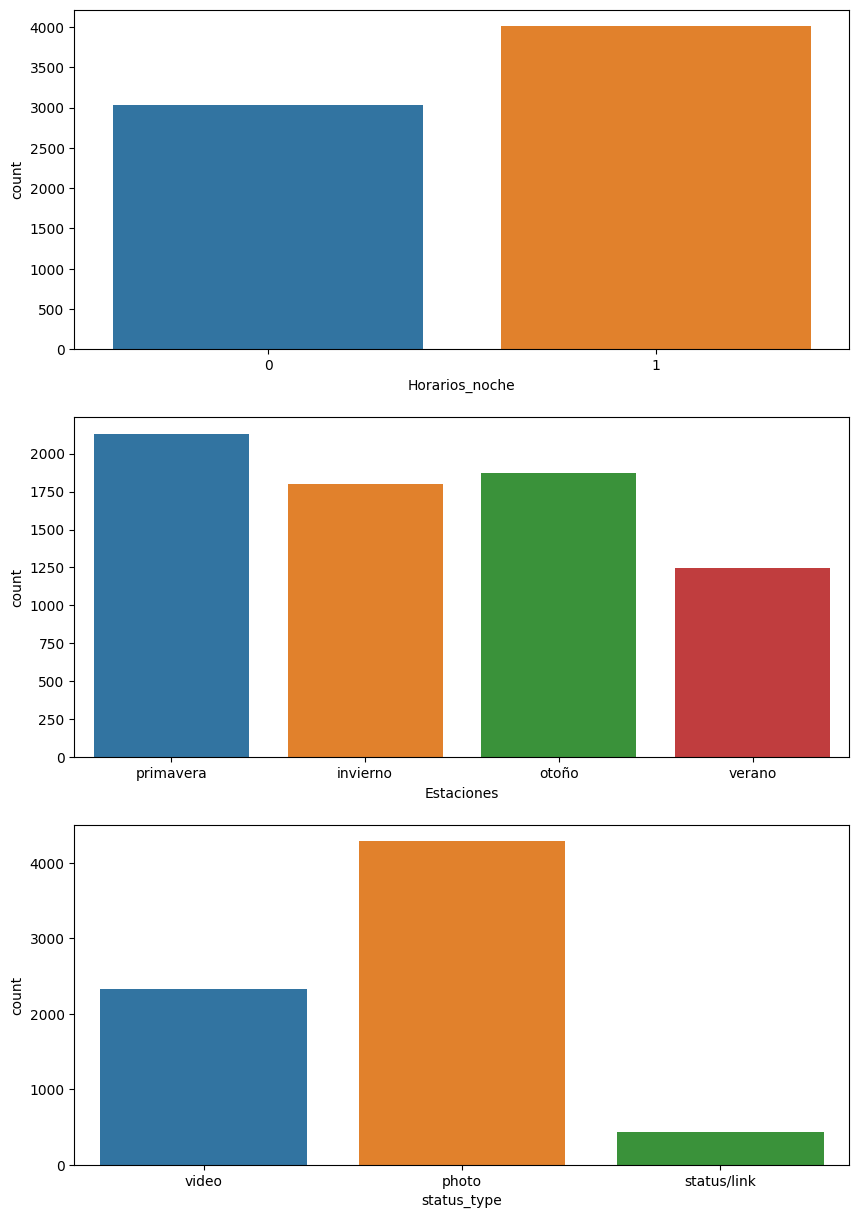

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for i, col in enumerate(['Horarios_noche', 'Estaciones', 'status_type']):
  sns.countplot(x=col, data=df_engagement, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels())

Vamos a pasar las estaciones, publicaciones y días de la semana a códigos numéricos

In [29]:
print(' Las estaciones: ', end="")
Estaciones = list(df_engagement.Estaciones.unique())
for i in range(len(Estaciones)):
    print(Estaciones[i], end=",")
df_engagement["Estaciones"] = df_engagement["Estaciones"].astype('category').cat.codes
print('\n Pasan a llamarse: ', end="")
Estaciones = list(df_engagement.Estaciones.unique())
for i in range(len(Estaciones)):
    print(Estaciones[i], end=",")

 Las estaciones: primavera,invierno,otoño,verano,
 Pasan a llamarse: 2,0,1,3,

In [30]:
print(' Las publicaciones: ', end="")
Publicaciones = list(df_engagement.status_type.unique())
for i in range(len(Publicaciones)):
    print(Publicaciones[i], end=",")
df_engagement["status_type"] = df_engagement["status_type"].astype('category').cat.codes
print('\n Pasan a llamarse: ', end="")
Publicaciones = list(df_engagement.status_type.unique())
for i in range(len(Publicaciones)):
    print(Publicaciones[i], end=",")

 Las publicaciones: video,photo,status/link,
 Pasan a llamarse: 2,0,1,

In [31]:
print(' Los días de la semana: ', end="")
dias = ['lunes','martes','miercoles','jueves','viernes','sabado','domingo']
for i in range(len(dias)):
    print(dias[i], end=",")
df_engagement["dia"] = df_engagement["dia"].astype('category').cat.codes
print('\n Pasan a llamarse: ', end="")
for i in range(10):
    print(i, end=",")

 Los días de la semana: lunes,martes,miercoles,jueves,viernes,sabado,domingo,
 Pasan a llamarse: 0,1,2,3,4,5,6,7,8,9,

Creamos una variable que se llame Total Engagement, la cual es la suma de las reacciones, los comentarios y los share

In [32]:
df_engagement['total_engagement'] = df_engagement['num_reactions'] + df_engagement['num_comments'] + df_engagement['num_shares']

Comprobamos que todas las variables sean númericas, datetime o booleanas

In [33]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   status_type         7050 non-null   int8 
 1   num_reactions       7050 non-null   int64
 2   num_comments        7050 non-null   int64
 3   num_shares          7050 non-null   int64
 4   Estaciones          7050 non-null   int8 
 5   dia                 7050 non-null   int8 
 6   Positive_reactions  7050 non-null   int64
 7   Negative_reactions  7050 non-null   int64
 8   Other_reactions     7050 non-null   int64
 9   Horarios_noche      7050 non-null   int32
 10  total_engagement    7050 non-null   int64
dtypes: int32(1), int64(7), int8(3)
memory usage: 746.9 KB


# Clusterización

Vamos a clusterizar el 90% de los datos, para clusterizarlos y crear un modelo que prediga a que cluster pertencen.
El otro 10% de los datos los "guardaremos" para clusterizarlos con el modelo que hemos creado.

In [34]:
X = df_engagement
y = pd.DataFrame(columns=['label'], index=range(7050))

In [35]:
# Dividimos los datos de "entrenamiento" y creamos el conjunto con el 10% de los datos que nos servirá para testear el modelo
X_train, X_conjuntoparatest, y_conjuntoparatest, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [36]:
# Creamos el conjunto para asignar clusters con el 90% de los datos de df_engagement que no están en el que hemos creado para testear
conjunto_clusterizar = X[~X.index.isin(X_conjuntoparatest.index)]

In [37]:
df_engagement.shape

(7050, 11)

In [38]:
conjunto_clusterizar.shape

(6345, 11)

### Selección de la mejor k (número de clusters/grupos)

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


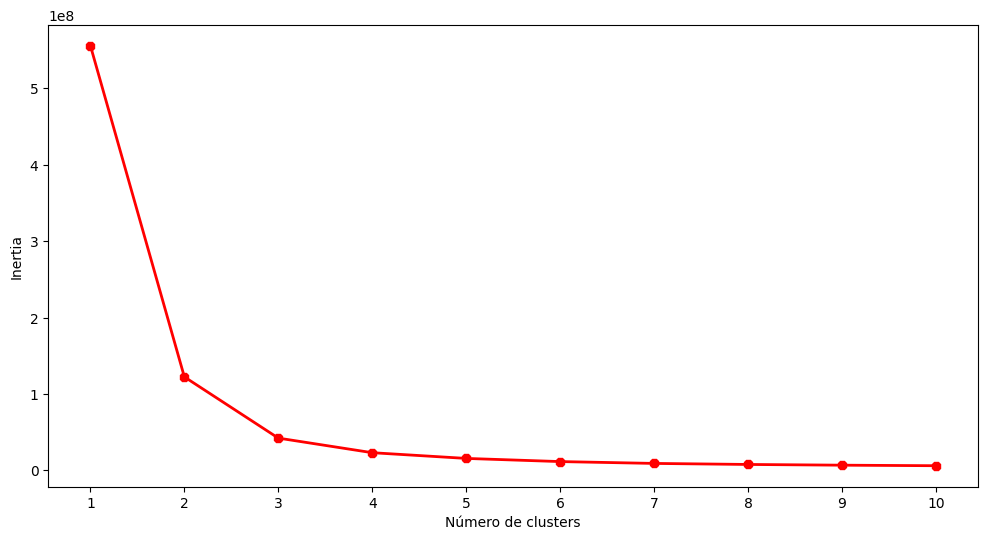

In [39]:
inertias = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(conjunto_clusterizar[conjunto_clusterizar.columns])
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertias,linewidth=2,color='red',marker='8')
plt.xlabel('Número de clusters')
plt.xticks(range(1,11))
plt.ylabel('Inertia')
plt.show()

El valor óptimo de K podríamos decir que es 3.

### Creación del modelo

In [40]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(conjunto_clusterizar[conjunto_clusterizar.columns])
conjunto_clusterizar["label"] = clusters

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\super\AppData\Local\Temp\ipykernel_18244\4077812753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conjunto_clusterizar["label"] = clusters


Ahora vamos a utilizar un modelo de clasificación que prediga las 3 clases

In [58]:
fig = px.scatter_3d(conjunto_clusterizar, x='Estaciones', y='total_engagement', z='status_type',
                    color='label',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

De este cluster podemos observar 3 gurpos:  
- El grupo 2 con las interacciones a sus publicaciones más bajas (comentarios, reacciones, shares). 
- El grupo 0, el cual tiene una interacción a las publicacines moderadas. Suele con partir fotos o vídeos y en menor medida enlaces o status.
- El grupo 1, cual tiene una alta interacción a sus publicaciones. Suele conectarse menos en verano y las publicaciones más realizadas son fotos y vídeos en una mayor medida.  
Este último grupo publica menos links o status  

# Exploración de datos

Como el pairplot tarda mucho en cargar, lo presentamos en imagen.  
Este sería el código para generarlo:  
sns.pairplot(conjunto_clusterizar, hue='label', palette='tab10')  
plt.show()  
![Output](output.png)

In [42]:
# Defino los datos correspondientes a las etiquetas
y = conjunto_clusterizar['label']

In [43]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = conjunto_clusterizar[['total_engagement']]

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split.
Para la separación de los datos, vamos a tomar un 10% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [44]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar posteriormete el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Creación del modelo de Clasificación

In [45]:
# Selección de k (número de vecinos más cercanos a tener en cuenta)
k = 3

# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# Ajuste del modelo al conjunto de datos de entrenamiento
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicción del conjunto de datos de prueba

In [46]:
# Predicción del conjunto de datos de prueba
y_pred = knn_model.predict(X_val)

## Validación de resultados

In [47]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_val
df_resultados['Valor Predicho'] = y_pred
df_resultados['Acierto'] = (df_resultados['Valor Predicho']) == (df_resultados['Valor Real'])
df_resultados.head()

,Valor Real,Valor Predicho,Acierto
4094,0,0,True
4330,2,2,True
6418,0,2,False
5702,0,0,True
522,2,2,True


### Matriz de confusión

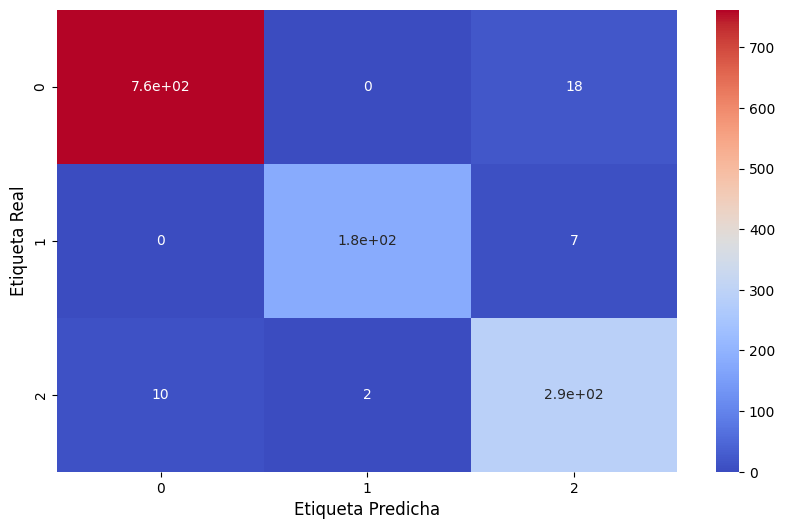

In [48]:
cf_matrix = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       780
           1       0.99      0.96      0.98       187
           2       0.92      0.96      0.94       302

    accuracy                           0.97      1269
   macro avg       0.97      0.97      0.97      1269
weighted avg       0.97      0.97      0.97      1269



A partir de la primera matriz de confusión obtenida del conjunto de validación, vemos que nuestro modelo tiene un alto rendimiento.  
En el informe proporcionado, vemos que el modelo tiene una precisión muy alta para todas las clases, lo que quiere decir que hay casi un 100% de datos clasificados  
correctamente sobre el total de datos. Además el recall de tosas las clases es muy alto.  
Vamos a ver que tal funciona con los datos de prueba


#### Guardado del modelo

In [50]:
# Guardamos el modelo en nuestro ordenador
nombre = 'modelo_clasificacion.sav'
pickle.dump(knn_model, open(nombre, 'wb'))

## Predicción del conjunto de prueba

#### Carga del modelo

In [51]:
# Carga del modelo desde nuestro ordenador
nombre = 'modelo_clasificacion.sav'
modelo_cargado = pickle.load(open(nombre, 'rb'))

In [52]:
# Predicción del conjunto de datos de prueba
y_pred = modelo_cargado.predict(X_conjuntoparatest[['total_engagement']])

In [53]:
X_conjuntoparatest['label'] = y_pred

Nuestro modelo ha predicho las etiquetas para todos los datos.

In [54]:
X_conjuntoparatest

,status_type,num_reactions,num_comments,num_shares,Estaciones,dia,Positive_reactions,Negative_reactions,Other_reactions,Horarios_noche,total_engagement,label
5460,2,196,58,10,0,3,194,0,2,1,264,2
1873,0,71,2,7,2,4,71,0,0,0,80,0
3738,0,0,0,0,3,0,0,0,0,0,0,0
5712,2,41,0,2,0,4,41,0,0,1,43,0
5292,2,162,58,10,2,2,159,1,2,1,230,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,118,13,0,0,2,118,0,0,0,131,0
6887,2,56,58,10,3,4,54,0,2,0,124,0
5755,0,20,0,0,1,0,20,0,0,1,20,0
6243,0,516,58,10,2,3,514,0,2,0,584,1
